In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [5]:
# Load dataset
df = pd.read_csv("/content/Mall_Customers.csv")

In [6]:
# Preview data
print("First 5 rows:")
print(df.head())

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [7]:
# Drop CustomerID and Gender for clustering (can encode Gender if needed)
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [8]:
# Optional PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [9]:
# Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

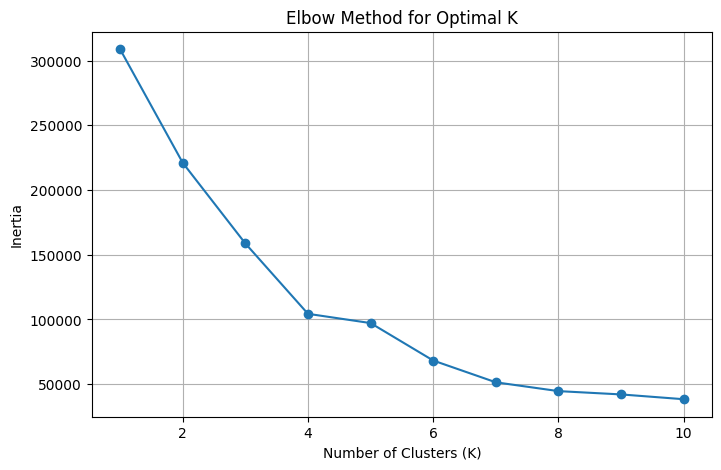

In [10]:
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.savefig("elbow_plot.png")
plt.show()

In [11]:

# Fit KMeans with chosen K (from elbow or silhouette)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)
df['Cluster'] = clusters


In [12]:
# Silhouette Score
score = silhouette_score(X, clusters)
print(f"Silhouette Score for k={optimal_k}: {score:.3f}")

Silhouette Score for k=5: 0.358


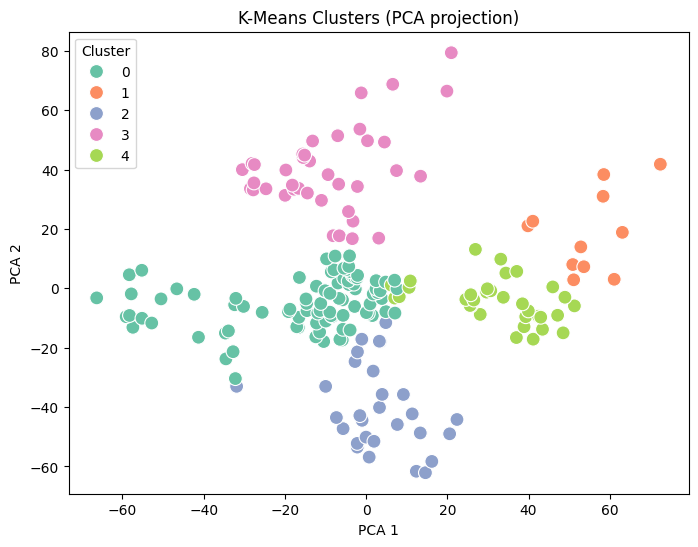

In [13]:
# Visualize clusters using PCA projection
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2', s=100)
plt.title('K-Means Clusters (PCA projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.savefig("cluster_plot.png")
plt.show()